In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
f = open("results.txt", "r")
u_fromFile = f.read()
# u1 = ''.join(filter(str.isalnum, u))
# u = u1
N, M = 100, 100
u_lst = u_fromFile.split(' ')
i = 0
u = np.zeros((M, N))
row = 0
for j in range(len(u_lst)):
    if '\n' in u_lst[j]:
        u[i, j - row] = u_lst[j].split('\n')[0]
        i += 1
        if i == N:
            break
        row += (N - 1)
        u[i, 0] =  u_lst[j].split('\n')[1]
    else:
        u[i, j - row] = u_lst[j]
u

array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       ...,
       [ 0.00000000e+000, -1.10237842e-010,  1.46916758e-009, ...,
         3.63870978e-101,  1.58337069e-103,  0.00000000e+000],
       [ 0.00000000e+000, -1.19644656e-010,  1.57050374e-009, ...,
         8.91549391e-101,  3.97901156e-103,  0.00000000e+000],
       [ 0.00000000e+000, -1.29700003e-010,  1.67685316e-009, ...,
         2.15292072e-100,  9.84874607e-103,  0.00000000e+000]])

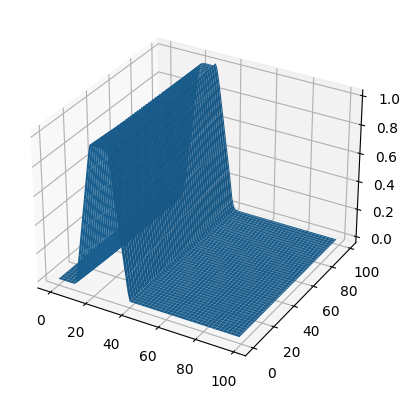

In [4]:
x = range(N)
y = range(M)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, u)

plt.show()

In [10]:
def init_cond(x):
    if (x >= 0 and x < 0.1) or (x >= 0.4 and x <= 1.0):
        return 0
    elif x >= 0.1 and x < 0.2:
        return 10 * (x - 0.1)
    elif x >= 0.2 and x < 0.3:
        return 1
    elif (x >= 0.3 and x < 0.4): 
        return -10 * (x - 0.4)
    else: 
        return 0

In [12]:
exact_sol = np.zeros_like(u)
c = 0.13
x_init = (0, 1)
t_init = (0, 0.1)
h = (x_init[1] - x_init[0]) / (N - 1)
tau = (t_init[1] - t_init[0]) / (M - 1)
for t in range(M):
    for x in range(N):
        exact_sol[t, x] = init_cond(x*h - c*t*tau)
exact_sol

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])